# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set()

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\saus\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


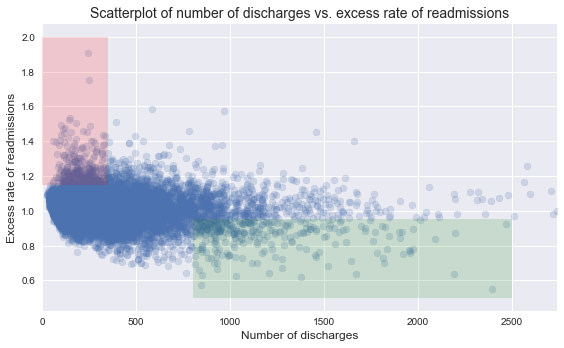

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

****
### Discussion and critique of given analysis, report and recommendations

__*I find the analysis above to be vague and possibly ill-formed.  I'm not at all sure what questions the analyst is trying to ask/answer and what significance is attached to the numerical statements (and why).*__

__*I would argue that recommending collapsing smaller hospitals into a smaller number of larger hospitals is an extremely expensive remedy for what may or may not be a problem strongly associated with size.  It's also clear even from the graph above that there are many 'small' hospitals without a readmissions problem.  It would be a shame to punish them for a problem they don't have.*__

__*From the original context of the problem, I would assume that the goal of the client (US government's Center for Medicare and Medicaid Services) is to discourage excess readmissions.  For this analysis to have any real-world impact, the questions and answers would have to be much more clearly stated.*__

__*I have issues with:*__
*  __*The cleaning methodology - rows are dropped without explanation.*__
*  __*The plot - 81 rows at the beginning and 4 rows at the end, without explanation.*__
*  __*Numbers(percentages) are presented with no calculations to support them. Given the lack of support in the report, their credibility is suspect.*__

__*More fundamentally, the problem statement says 'readmissions for heart attack, heart failure, and pneumonia'.  Why does this dataset include data on two other procedures (Acute Myocardial Infarction, Hip/Knee)?  Should excess readmissions for these procedures be counted as 'needing to be reduced'?  Why or why not?*__

__*These omissions would make me question the results, if I were the customer. *__

__*There are further comments below, embedded in the analysis.*__

---

### Exercise

B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****




## Part B.

1. Setup an appropriate hypothesis test.

    __*Appropriate for what?  The is no compelling reason from the above to compute any statistical values.  The suggestion in the preliminary report, that the smallest hospitals should be somehow changed into bigger ones is not convincingly supported.*__  
    
    __*The customer is (apparently) interested in discouraging excess readmissions.  My approach (implemented below) is to examine the data for factors with highly significant associations with excess readmissions.*__ 
    
    __*Should those associations exist, it may be appropriate to assess their significance with statistical hypothesis tests.*__
    
    __*Analysis below.*__
    
---

## Start by examining the dataset features and relationships between features.

#### Preliminary observation
When the goal is a statistically meaningful result, it's important to have some understanding of what the data represent and how the variables relate to each other functionally.  With that understanding in hand, we are considerably more likely to either produce or rule out the possibility of producing a useful result.

This is why EDA is so important.

__*The number of discharges becomes non-zero at row 81.*__

In [5]:
#  rename 'clean' data for convenience
data = clean_hospital_read_df; data.iloc[79:83]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16339,UNM SANDOVAL REGIONAL MEDICAL CENTER,320089,NM,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14074,LATIMER COUNTY GENERAL HOSPITAL,370072,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013


In [6]:
# what are the types?  are there nulls?
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [7]:
# we have 12k columns of 12 rows
data.shape

(11578, 12)

### What's in this data set?

The blurb above says, __*'Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.'.*__

One would like to know exactly how the 'predicted' and 'expected' values are calculated. [QualityNet](http://www.qualitynet.org/dcs/ContentServer?c=Page&pagename=QnetPublic%2FPage%2FQnetTier3&cid=1228775713046) says:

> Predicted readmissions are the number of unplanned readmissions CMS predicted based on a hospital’s performance with its case mix and the estimated effect on readmissions (i.e., the hospital-specific effect). Section 3025 of the Affordable Care Act refers to predicted readmissions as “Adjusted Actual Readmissions”.

> Expected readmissions are the number of unplanned readmissions CMS expected based on a hospital’s average performance with its case mix and the average hospital effect.

Further, beyond the short statements above, there is no description of the other features in the dataset and how they are related.  The provided links don't provide any additional insight.

The following points and questions come from an examination of the dataset and problem statement.

* 'Excess Readmission Ratio' is the target datum.  This is $Predicted Readmission Rate/Expected Readmission Rate$.
* 'Number of Discharges' and 'Number of Readmissions' are integers, presumably reported by the hospitals.  
* Predicted Readmission Rate is *not* the same as $Number of Readmissions/Number of Discharges$.  You could call that ratio the 'raw' readmissions rate.  CMS uses some unspecified methodology to calculate the Predicted Rate that includes the raw rate and some description of the patient mix.  If the patient mix is unfavorable (sicker, older, etc.) more readmissions are allowed.

* Dates have no significance - they're all the same.
* Footnotes - there are only 81 non-nans and they are all 7.0, with no legend.

* There are 81 rows with 'Number of Discharges' == 0; these have footnote 7.  This is presumably why they skip the first 81 rows in the plot.
* The analyst omits the last 3 (largest by admissions) rows in the scatter plot without explanation.

* In a serious study, state would be worth examining to see if there are regional differences.
* There are 5 different procedures are included in the data.  Is there a difference in readmission distribution, procedure to procedure?  Two of the five are not mentioned in the problem description (AMI, Hip/Knee).  Should these been included or excluded from the data?
* Since there are 5 different procedures, the rows are not really hospitals, but pairs, $(hospital, procedure)$.  An obvious question is "If a hospital has excess readmissions for one procedure, how do they do on the other procedures?".  Without the answer, one doesn't know if individual hospitals have problems or just departments within the hospital.  What you would do to remedy a readmissions problem might be different if a hospital has problems in all departments.  Note: there are 2,921 unique hospital names and 11,578 rows, indicating most hospitals perform multiple procedures.

* When assessing if a group of hospitals has a higher rate of excess readmissions, we need a metric (or statistic) to apply when aggregating.  The one I use below is the proportion of the group that has $Excess Readmission Ratio > 1.0$.  If $n$ is the number of hospitals (actually hospital/procedure) in the group,

$$metric =  \sum_{i=1}^n (ExcessReadmissionRatio_i > 1.0)$$

* Another possible metric would be mean ExcessReadmissionRatio within a group.

##### Examine dataset

In [8]:
# summary stats for all features
data.describe(include='all')

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
count,11578,11578.000000,11578,11578,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000,11578,11578
unique,2921,NaN,51,5,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,GOOD SAMARITAN HOSPITAL,NaN,CA,READM-30-HF-HRRP,NaN,NaN,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
freq,30,NaN,944,2841,NaN,NaN,NaN,NaN,NaN,NaN,11578,11578
mean,NaN,257681.537226,NaN,NaN,362.909397,7.0,1.007504,17.984292,17.865695,63.633731,NaN,NaN
std,NaN,154542.645531,NaN,NaN,309.176945,0.0,0.091964,5.487651,5.240749,59.540296,NaN,NaN
min,NaN,10001.000000,NaN,NaN,0.000000,7.0,0.549500,2.700000,3.900000,11.000000,NaN,NaN
25%,NaN,110129.750000,NaN,NaN,157.000000,7.0,0.952600,16.300000,16.600000,24.000000,NaN,NaN
50%,NaN,250040.000000,NaN,NaN,280.000000,7.0,1.003500,19.000000,19.000000,45.000000,NaN,NaN
75%,NaN,390041.000000,NaN,NaN,472.750000,7.0,1.058100,21.500000,21.400000,82.000000,NaN,NaN


In [9]:
# how many with 0 discharges and footnote == 7.0
((data['Number of Discharges'] == 0) & (data['Footnote'] == 7.0)).sum()

81

__*Note: Because we may want to plot histograms and do stats tests, we need to drop (explicitly) the first 81 rows that have 0 for numeric fields, because those functions throw exceptions on zeros.*__

In [10]:
data = data.drop(data.iloc[0:81].index)

In [11]:
# We retain the data with 25 or more discharges
data.head(3)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013


##### Is there something obviously wrong with the last 3 rows that causes them to be excluded in the figure above?  They are the 3 largest in 'Number of Discharges'. They might be inconvenient for the plot  (by making range more than twice as wide).

In [12]:
# last 5
data.tail(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


---
### First, we look at readmissions by state.

In [13]:
# helper function to get the metric.  return proportion of input group with Excess Readmission Ratio > 1.0
def get_group_ERRatio_prop(group):
    excess = (group['Excess Readmission Ratio'] > 1.0).sum()
    return excess/len(group)

In [14]:
# works on the whole set
get_group_ERRatio_prop(data)

0.51656953987996868

In [15]:
# alternate metric - mean Excess Readmission Ratio for the input group
def get_group_ave(group):
    return group['Excess Readmission Ratio'].mean()

In [16]:
# works on the whole set
get_group_ave(data)

1.0075037835957146

In [17]:
# build a df for plotting 

# list of tuples, (state, metric, size), sorted by metric, largest first
blob = sorted([(state,                              # state
                get_group_ERRatio_prop(df),         # metric
                len(df))                            # size of group
               for state, df in data.groupby('State')], 
              key=lambda x: x[1], reverse=True)

dfStateExcessCount = pd.DataFrame(blob, columns=['state', 'agg_excess_prop', 'count']); dfStateExcessCount.head()

,state,agg_excess_prop,count
0,DC,0.862069,29
1,WV,0.779817,109
2,NJ,0.758865,282
3,NY,0.713559,590
4,KY,0.689796,245


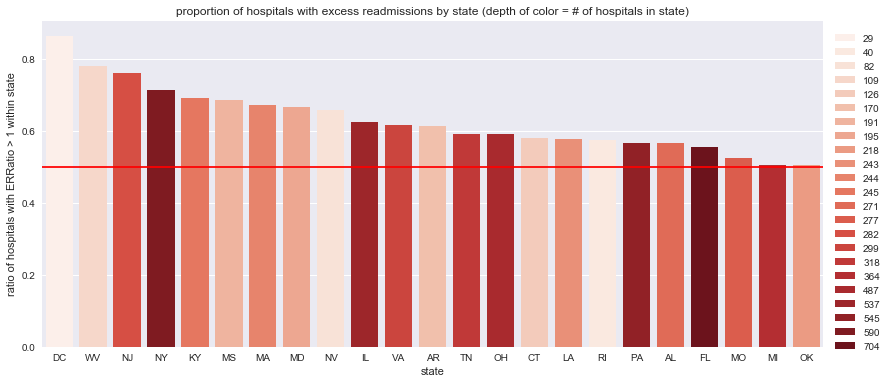

In [18]:
fig, ax = plt.subplots(figsize=(14,6))

sns.barplot(x='state', y='agg_excess_prop', hue='count', 
            data=dfStateExcessCount[dfStateExcessCount.agg_excess_prop > 0.50], 
            dodge=False, palette='Reds')

plt.legend(bbox_to_anchor=(1.01, 0.97), loc=2, borderaxespad=0.)
ax.plot([-1,1000], [0.5, 0.5], color='red');
plt.xlabel('state')
plt.ylabel('ratio of hospitals with ERRatio > 1 within state')
plt.title('proportion of hospitals with excess readmissions by state (depth of color = # of hospitals in state)');

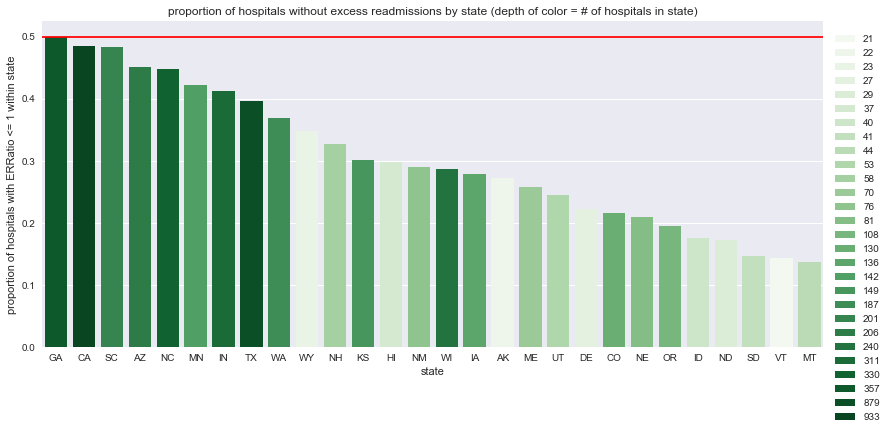

In [19]:
fig, ax = plt.subplots(figsize=(14,6))

sns.barplot(x='state', y='agg_excess_prop', hue='count', 
            data=dfStateExcessCount[dfStateExcessCount.agg_excess_prop <= 0.50], 
            dodge=False, palette='Greens')

plt.legend(bbox_to_anchor=(1.01, 0.97), loc=2, borderaxespad=0.)
ax.plot([-1,1000], [0.5, 0.5], color='red');
plt.xlabel('state')
plt.ylabel('proportion of hospitals with ERRatio <= 1 within state')
plt.title('proportion of hospitals without excess readmissions by state (depth of color = # of hospitals in state)');

###  The first figure above shows the 23 states where a majority of hospitals have excess readmissions.  The second figure shows the other states where a majority of hospitals have excess readmission rate <= 1.0.

__*  What does the alternate metric tell us? *__

In [20]:
# build a df for plotting 

# list of tuples, (state, metric, size), sorted by metric, largest first
blob = sorted([(state,                              # state
                get_group_ave(df),                  # the other metric
                len(df))                            # size of group
               for state, df in data.groupby('State')], 
              key=lambda x: x[1], reverse=True)

dfStateExcessAvs = pd.DataFrame(blob, columns=['state', 'agg_excess_ave', 'count']); dfStateExcessAvs.head()

,state,agg_excess_ave,count
0,DC,1.087121,29
1,WV,1.055961,109
2,NJ,1.053389,282
3,NY,1.047684,590
4,KY,1.047303,245


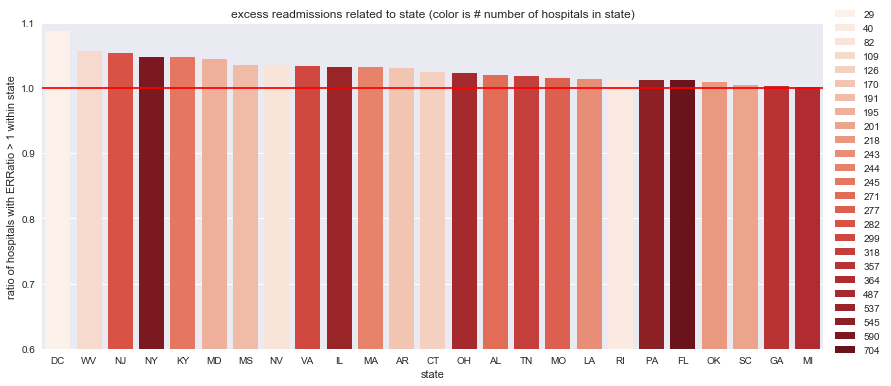

In [21]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='state', y='agg_excess_ave', hue='count', 
            data=dfStateExcessAvs[dfStateExcessAvs.agg_excess_ave > 1.0], 
            dodge=False, palette='Reds')
#ax.legend_.remove()
plt.legend(bbox_to_anchor=(1.01, 1.05), loc=2, borderaxespad=0.)
ax.plot([-1,1000], [1.0, 1.0], color='red');
plt.xlabel('state')
plt.ylabel('ratio of hospitals with ERRatio > 1 within state')
plt.title('excess readmissions related to state (color is # number of hospitals in state)')
plt.ylim(.6, 1.1);

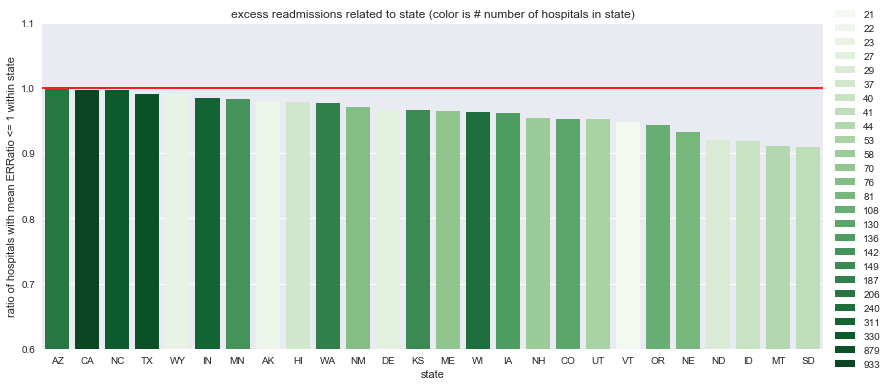

In [22]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='state', y='agg_excess_ave', hue='count', 
            data=dfStateExcessAvs[dfStateExcessAvs.agg_excess_ave <= 1.0], 
            dodge=False, palette='Greens')
#ax.legend_.remove()
plt.legend(bbox_to_anchor=(1.01, 1.05), loc=2, borderaxespad=0.)
ax.plot([-1,1000], [1.0, 1.0], color='red');
plt.xlabel('state')
plt.ylabel('ratio of hospitals with mean ERRatio <= 1 within state')
plt.title('excess readmissions related to state (color is # number of hospitals in state)')
plt.ylim(.6, 1.1);

####  The alternate metric gives similar results. The first figure above shows the 25 states where the mean Excess Readmission Ratio > 1.0.  The second figure shows the other states.  The second metric (aggregate mean of the Excess Readmission Rate) finds the same 23 states plus 2 more possibly problematic states.

__* Compare the groups found by the metrics.  They are close. But they definitely agree on the most problematic ones. *__

In [23]:
print(sorted(dfStateExcessCount[dfStateExcessCount.agg_excess_prop > 0.50].state.tolist()))

['AL', 'AR', 'CT', 'DC', 'FL', 'IL', 'KY', 'LA', 'MA', 'MD', 'MI', 'MO', 'MS', 'NJ', 'NV', 'NY', 'OH', 'OK', 'PA', 'RI', 'TN', 'VA', 'WV']


In [24]:
print(sorted(dfStateExcessAvs[dfStateExcessAvs.agg_excess_ave > 1.0].state.tolist()))

['AL', 'AR', 'CT', 'DC', 'FL', 'GA', 'IL', 'KY', 'LA', 'MA', 'MD', 'MI', 'MO', 'MS', 'NJ', 'NV', 'NY', 'OH', 'OK', 'PA', 'RI', 'SC', 'TN', 'VA', 'WV']


In [25]:
s1 = set(dfStateExcessCount[dfStateExcessCount.agg_excess_prop > 0.50].state)
s2 = set(dfStateExcessAvs[dfStateExcessAvs.agg_excess_ave > 1.0].state)
(len(s1), len(s2))

(23, 25)

In [26]:
s2 - s1

{'GA', 'SC'}

##### If you take out the 'bad states' and  replot ExcessReadmissionRatio vs. size , what do you see?  Nobody at the very smallest hospitals is doing very well.

In [27]:
# 'good' state mask
good_states = data['State'].map(lambda x: x not in s2)
# not in s2]
#data[good_states].sample(2)

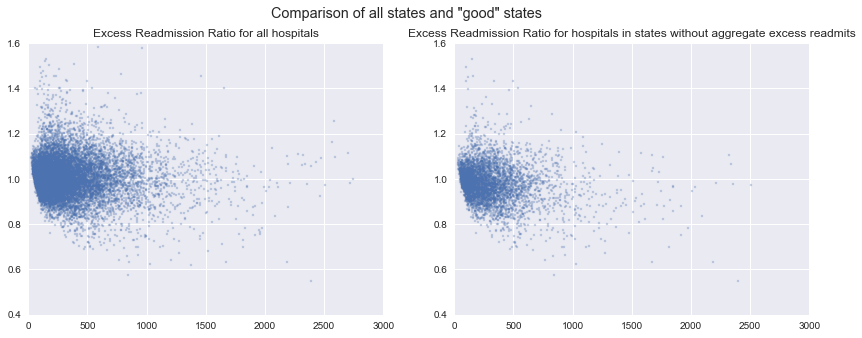

In [28]:
# side by side, please.
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(14,5))
# distribution of size
# same plot as above but include last 3 rows, too.
ax1.scatter(data['Number of Discharges'], data['Excess Readmission Ratio'], marker=',', s=2, alpha=0.25)
ax1.set_xlim(0,3000)
ax1.set_ylim(0.4,1.6)
ax1.set_title('Excess Readmission Ratio for all hospitals')

ax2.scatter(data[good_states]['Number of Discharges'], 
            data[good_states]['Excess Readmission Ratio'], 
            marker=',', s=2, alpha=0.25)
ax2.set_xlim(0,3000)
ax2.set_ylim(0.4,1.6)
ax2.set_title('Excess Readmission Ratio for hospitals in states without aggregate excess readmits')
fig.suptitle('Comparison of all states and "good" states');

##### Do we see a reduction in aggregate excluding states with aggregate excess.  Yes,  substantial.

In [29]:
(data['Excess Readmission Ratio'].mean(), data['Excess Readmission Ratio'].median())

(1.0075037835957146, 1.0035)

In [30]:
data[good_states]['Excess Readmission Ratio'].mean(), data[good_states]['Excess Readmission Ratio'].median()

(0.979995152069521, 0.9782)

## Analysis of the relationship of state and readmission rates

__*It's very clear from the above plots, that 23-25 states have an aggregate readmission problem, while the other states do not.  One takeaway is that the customer might be advised to focus efforts on the group of states with aggregate excess readmissions.  *__

---

---

## Does the procedure have a relation with excess readmissions?

In [31]:
blob = sorted([(measure, get_group_ERRatio_prop(df), len(df)) 
               for measure, df in data.groupby('Measure Name')], key=lambda x: x[1])
dfProcExcessCount = pd.DataFrame(blob, columns=['procedure', 'agg_excess_prop', 'count']); dfProcExcessCount

,procedure,agg_excess_prop,count
0,READM-30-PN-HRRP,0.498745,2789
1,READM-30-COPD-HRRP,0.506051,2727
2,READM-30-HF-HRRP,0.506883,2833
3,READM-30-HIP-KNEE-HRRP,0.549964,1371
4,READM-30-AMI-HRRP,0.550366,1777


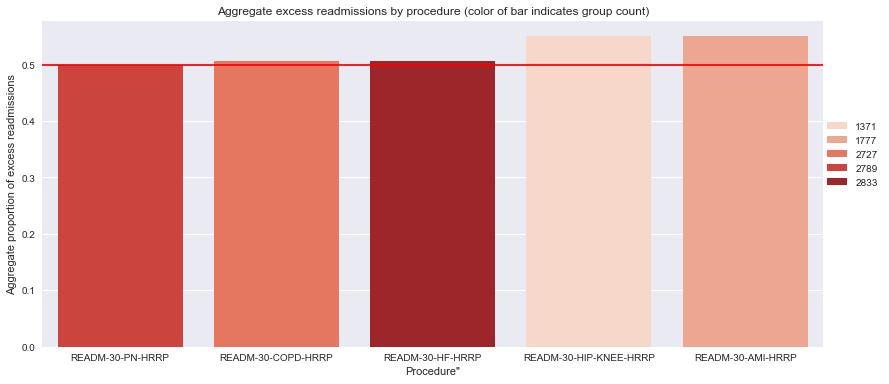

In [32]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot('procedure', 'agg_excess_prop', data=dfProcExcessCount, ax=ax, hue='count', dodge=False, palette='Reds')
#ax.legend_.remove()
plt.legend(bbox_to_anchor=(1.0, 0.7), loc=2, borderaxespad=0.)
ax.plot([-1,1000], [0.5, 0.5], color='red');
plt.xlabel('Procedure"')
plt.ylabel('Aggregate proportion of excess readmissions')
plt.title('Aggregate excess readmissions by procedure (color of bar indicates group count)');
# plt.legend(loc='lower right');

In [33]:
theMeasures = data['Measure Name'].unique(); theMeasures

array(['READM-30-AMI-HRRP', 'READM-30-HF-HRRP', 'READM-30-PN-HRRP',
       'READM-30-COPD-HRRP', 'READM-30-HIP-KNEE-HRRP'], dtype=object)

In [34]:
theRightMeasures = ['READM-30-HF-HRRP', 'READM-30-PN-HRRP', 'READM-30-COPD-HRRP']
procOK = data['Measure Name'].map(lambda x: x in theRightMeasures)

##### If you take out the questionable procedures and  replot ExcessReadmissionRatio, what do you see? The smallest hospitals still have a problem.  But many of the outlying points with ERRatio above 1.2 are no longer present.  This missing group represents the poor performance on the questionable procedures (AMI and Hip/Knee) at all sizes.

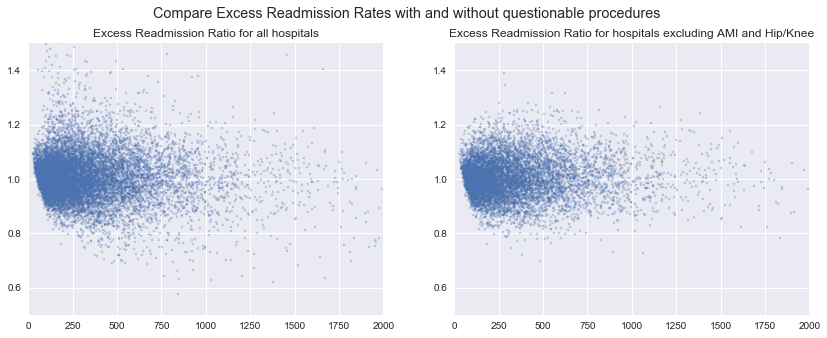

In [35]:
# side by side, please.
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.scatter(data['Number of Discharges'], data['Excess Readmission Ratio'], marker=',', s=2, alpha=0.25)
ax1.set_xlim(0,2000)
ax1.set_ylim(0.5,1.5)
ax1.set_title('Excess Readmission Ratio for all hospitals')

ax2.scatter(data[procOK]['Number of Discharges'], 
            data[procOK]['Excess Readmission Ratio'], 
            marker=',', s=2, alpha=0.25)
ax2.set_xlim(0,2000)
ax2.set_ylim(0.5,1.5)
ax2.set_title('Excess Readmission Ratio for hospitals excluding AMI and Hip/Knee')
fig.suptitle('Compare Excess Readmission Rates with and without questionable procedures');

##### Do we see a reduction in aggregates excluding non-valid procedures.  Smallish numerically, but seems to make distribution more symmetrical.

In [36]:
(data['Excess Readmission Ratio'].mean(), data['Excess Readmission Ratio'].median())

(1.0075037835957146, 1.0035)

In [37]:
data[procOK]['Excess Readmission Ratio'].mean(), data[procOK]['Excess Readmission Ratio'].median()

(1.004173014732303, 1.0008)

### Analysis of procedure and excess readmission rate

The figure above shows that Hip/Knee and Acute Myocardial Infarction have more excess readmissions than the other procedures.  It is not clear from the problem statement whether or not these data should be included in study or not.  From the analyst's point of view it is imperative to know whether these procedures should be included in the study or not.  Clarification from the client should be sought.

---

##### If you remove both the states with poor performance and procedures with high readmissions, what is the impact on readmissions vs. size?  

##### Again the very smallest hospitals aren't able to manage without excess readmissions.  See the second figure below, focused on that region.  The shaded triangle is almost completely unpopulated.  Either hospitals with less than 100 discharges can't manage without excess readmissions or the metric for excess doesn't reflect this population properly.  There are almost no hospitals with less than 100 discharges that don't have excess readmissions, even after excluding problematic states and procedures.

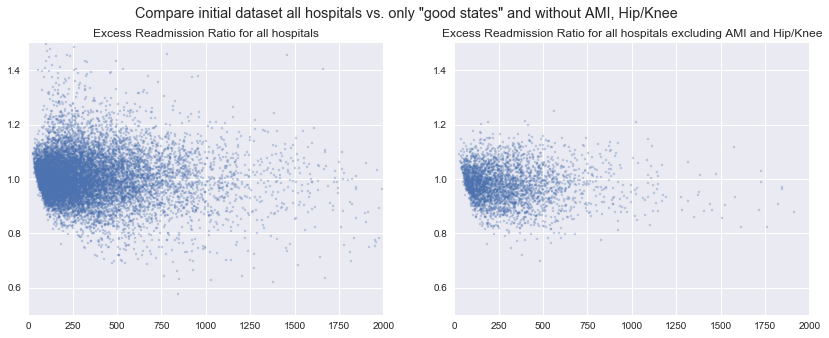

In [38]:
# side by side, please.
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

ax1.scatter(data['Number of Discharges'], data['Excess Readmission Ratio'], marker=',', s=2, alpha=0.25)
ax1.set_xlim(0,2000)
ax1.set_ylim(0.5,1.5)
ax1.set_title('Excess Readmission Ratio for all hospitals')

ax2.scatter(data[procOK & good_states]['Number of Discharges'], 
            data[procOK & good_states]['Excess Readmission Ratio'], 
            marker=',', s=2, alpha=0.25)
ax2.set_xlim(0,2000)
ax2.set_ylim(0.5,1.5)
ax2.set_title('Excess Readmission Ratio for all hospitals excluding AMI and Hip/Knee')
fig.suptitle('Compare initial dataset all hospitals vs. only "good states" and without AMI, Hip/Knee');

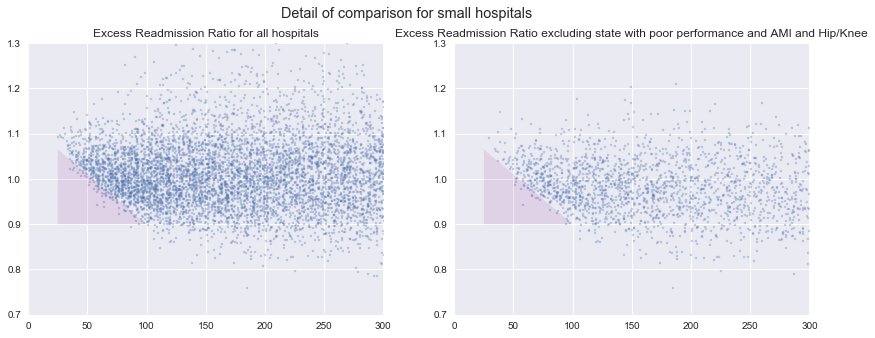

In [39]:
# zoom in and highlight interesting region.
fig,(ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

# make a line for the upper bound
x = np.arange(25, 100)
y = 1.12 - 0.0022 * x

ax1.scatter(data['Number of Discharges'], data['Excess Readmission Ratio'], marker=',', s=2, alpha=0.25)
ax1.fill_between(x,y, 0.9, alpha=.1, facecolor='purple')
ax1.set_xlim(0,300)
ax1.set_ylim(0.7,1.3)
ax1.set_title('Excess Readmission Ratio for all hospitals')

ax2.scatter(data[procOK & good_states]['Number of Discharges'], 
            data[procOK & good_states]['Excess Readmission Ratio'], 
            marker=',', s=2, alpha=0.25)
ax2.fill_between(x,y, 0.9, alpha=.1, facecolor='purple')
ax2.set_xlim(0,300)
ax2.set_ylim(0.7,1.3)
ax2.set_title('Excess Readmission Ratio excluding state with poor performance and AMI and Hip/Knee')
fig.suptitle('Detail of comparison for small hospitals');

##### Do we see a reduction in aggregates excluding non-valid procedures and bad states?   Distribution is better behaved but there is still a wedge at the very low end of the size spectrum.  It only becomes symetric around 1.0 at discharges > 100.

In [40]:
(data['Excess Readmission Ratio'].mean(), data['Excess Readmission Ratio'].median())

(1.0075037835957146, 1.0035)

In [41]:
data[procOK & good_states]['Excess Readmission Ratio'].mean(), data[procOK & good_states]['Excess Readmission Ratio'].median()

(0.9792704845815017, 0.9788)

---

### Assess whether size in number of discharges is related to excessive readmissions.

__* To get an understanding of whether or not size in number of discharges and excess readmissions are related, we divide the population into groups $0 < n_0 <= 100, < n_1 <= 200$, etc.  Then we plot the proportion of excess readmissions against the size of the group.  *__

In [42]:
# find the size group for each row
size_group = (data['Number of Discharges']/100).map(lambda x: int(x + 1))

In [43]:
# store it with the data
data = data.assign(size_group=size_group)

In [44]:
# summary stats; 68xx is the largest one; we already know smallest number of discharges is 25 (group 1)
data.size_group.describe()

count    11497.000000
mean         4.151170
std          3.101441
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         68.000000
Name: size_group, dtype: float64

In [45]:
blob = sorted([((g-1)*100, get_group_ERRatio_prop(df), len(df))
               for g, df in data.groupby('size_group')],
              key=lambda x: x[0])
dfSizeExcessCount = pd.DataFrame(blob, columns=['size_group', 'agg_excess_prop', 'count']); dfSizeExcessCount.head(3)

,size_group,agg_excess_prop,count
0,0,0.632155,1188
1,100,0.505680,2729
2,200,0.525787,2191


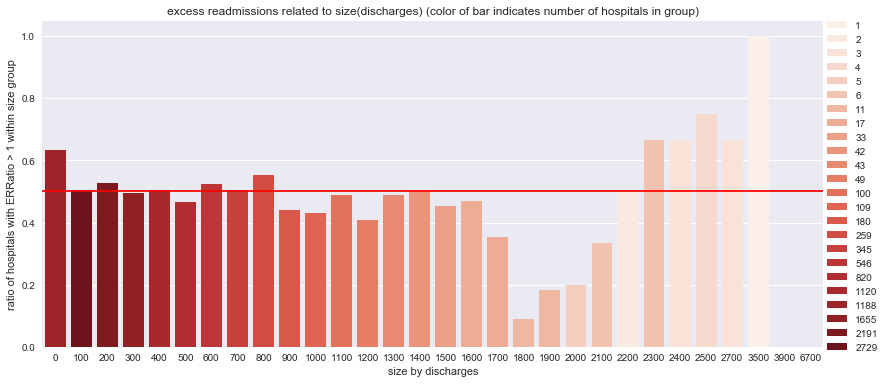

In [46]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='size_group', y='agg_excess_prop', hue='count', 
            data=dfSizeExcessCount, 
            dodge=False, palette='Reds')
#ax.legend_.remove()
plt.legend(bbox_to_anchor=(1.0, 1.01), loc=2, borderaxespad=0.)
ax.plot([-1,1000], [0.5, 0.5], color='red');
plt.xlabel('size by discharges')
plt.ylabel('ratio of hospitals with ERRatio > 1 within size group')
plt.title('excess readmissions related to size(discharges) (color of bar indicates number of hospitals in group)');

__*I would infer from the plot above that size is not strongly correlated with a high rates of excess readmissions.  Some of the largest hospitals have the highest proportion of excess readmissions. Medium sizes have the lowest rates and smaller hospitals do okay with the exception of the smallest (number of discharges) group. The two largest hospitals (3900 and 6700 discharges) don't have any excess readmissions.*__

__* The group between 0 and 100 discharges stands out.  As well, the group between 800 and 900, and the groups between 2300 and 3600 have high readmissions.*__

### If we remove the two questionable procedures and states with poor aggregate performance, are there still problem areas (for excess readmission)?

In [47]:
dataOK =data[good_states & procOK]; # dataOK.sample(5)

blob = sorted([((g-1)*100, get_group_ERRatio_prop(df), len(df))
               for g, df in dataOK.groupby('size_group')],
              key=lambda x: x[0])
dfOKSizeExcessCount = pd.DataFrame(blob, columns=['size_group', 'agg_excess_prop', 'count']); dfOKSizeExcessCount.head()

,size_group,agg_excess_prop,count
0,0,0.514745,373
1,100,0.346739,920
2,200,0.329114,632
3,300,0.338115,488
4,400,0.360927,302


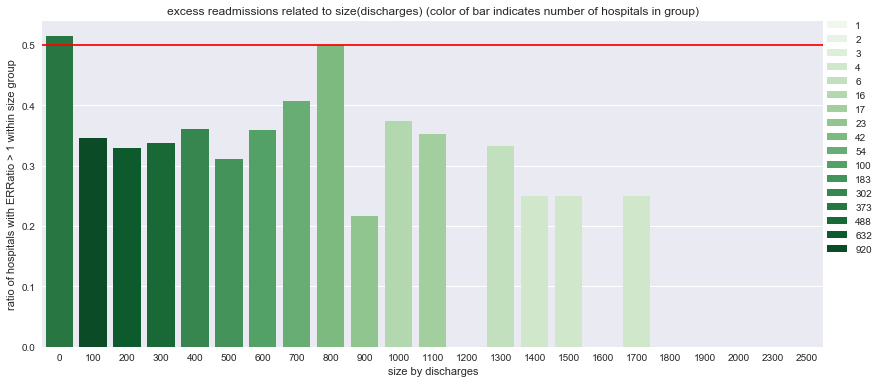

In [48]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='size_group', y='agg_excess_prop', hue='count', 
            data=dfOKSizeExcessCount, 
            dodge=False, palette='Greens')
#ax.legend_.remove()
plt.legend(bbox_to_anchor=(1.0, 1.01), loc=2, borderaxespad=0.)
ax.plot([-1,1000], [0.5, 0.5], color='red');
plt.xlabel('size by discharges')
plt.ylabel('ratio of hospitals with ERRatio > 1 within size group')
plt.title('excess readmissions related to size(discharges) (color of bar indicates number of hospitals in group)');

In [49]:
# correlation of -0.1 isn't something to base a recommendation on; that hasn't changed 
np.corrcoef(dataOK['Number of Discharges'], dataOK['Excess Readmission Ratio'])

array([[ 1.        , -0.09626197],
       [-0.09626197,  1.        ]])

### As expected all the size groups do better when we exclude states with poor aggregate performance and  AMI and Hip/Knee procedures.  The apparent problem at 3500 discharges completely disappears.  But there is still a  performance  shortfall in  the hospitals  (373) with less than 100 discharges.  The same conclusion applies to the hospitals with 800-899 discharges (42).  

### We draw the conclusion that is that there is a significant performance issue at hospitals with less than 100 discharges because it cannot be accounted for by location or questionable procedures.

### The EDA provides strong evidence that there is likely to be a statistically significant difference between these groups and the overall population.  A statistical measure can now be applied to assess whether or not this is the case.

---

__*We use the z test to test the null hypothesis $H_0$.*__

__*$H_0$: the mean of Excess Readmissions Ratio for discharges < 100 = mean of  Excess Readmissions Ratio for discharges >= 100*__

In [50]:
# hospitals with <= 100 discharges
dataOKLTE100 = dataOK[(dataOK['Number of Discharges'] <= 100)]

In [51]:
# hospitals with > 100 discharges
dataOKGT100 = dataOK[(dataOK['Number of Discharges'] > 100)]

In [52]:
from statsmodels.stats.weightstats import ztest
z_score, p_value = ztest(dataOKLTE100['Excess Readmission Ratio'], dataOKGT100['Excess Readmission Ratio'])
print('p-value: {:4.6f}, z-score: {:4.4f}'.format(p_value, z_score))

p-value: 0.000000, z-score: 8.2262


__*Since the p-value is zero to six significant digits, we reject the null hypothesis.  There is a statistically significant difference between the mean Excess Readmissions Ratios between hospitals smaller and larger than 100 discharges.*__

### Comments on the smallest hospitals

QualityNet has the following information at the link above: 

> If a hospital has fewer than 25 eligible discharges for any measure in HRRP, CMS will not use the ERR for that measure in its payment adjustment calculation. This ensures CMS has enough information to reliably determine a hospital’s performance on each measure.

The figure below shows that even excluding questionable procedures and state with poor overall performance every single hospital with less than 50 discharges has excess readmissions (20 hospitals).  By 100 discharges, the hospitals are performing quite well.  This explains the shaded area in the plot above.

It may be the case that 25 is not a large enough group for CMS to reliably apply their algorithm for calcuating excess admissions.    

In [53]:
# get the size by tens for grouping
sizeByTens = dataOKLTE100['Number of Discharges']//10

In [54]:
sizeByTens.head()

1853    2
2825    3
2944    3
1471    3
4092    3
Name: Number of Discharges, dtype: int32

In [55]:
blob = sorted([(g*10, get_group_ERRatio_prop(df), len(df)) for g, df in dataOKLTE100.groupby(sizeByTens)],
              key=lambda x: x[0])
dfOKLTE100SizeExcessCount = pd.DataFrame(blob, columns=['sizeByTens', 'agg_excess_prop', 'count']); dfOKLTE100SizeExcessCount

,sizeByTens,agg_excess_prop,count
0,20,1.000000,1
1,30,1.000000,7
2,40,1.000000,12
3,50,0.780488,41
4,60,0.622951,61
5,70,0.543210,81
6,80,0.341176,85
7,90,0.341176,85
8,100,0.166667,12


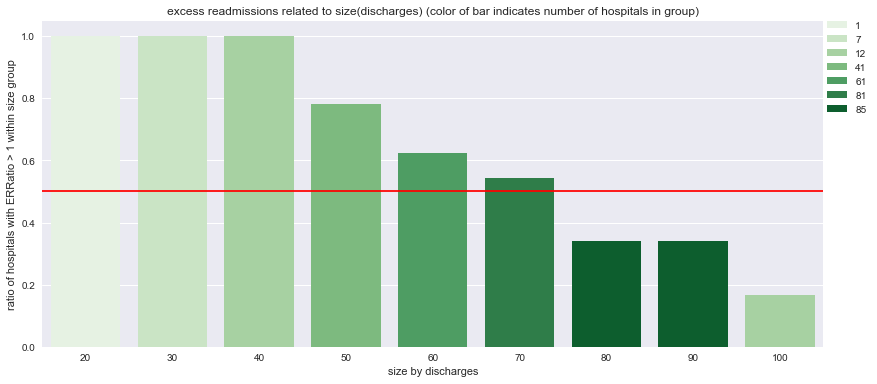

In [56]:
fig, ax = plt.subplots(figsize=(14,6))
sns.barplot(x='sizeByTens', y='agg_excess_prop', hue='count', 
            data=dfOKLTE100SizeExcessCount, 
            dodge=False, palette='Greens')
#ax.legend_.remove()
plt.legend(bbox_to_anchor=(1.0, 1.01), loc=2, borderaxespad=0.)
ax.plot([-1,1000], [0.5, 0.5], color='red');
plt.xlabel('size by discharges')
plt.ylabel('ratio of hospitals with ERRatio > 1 within size group')
plt.title('excess readmissions related to size(discharges) (color of bar indicates number of hospitals in group)');

### Recommendations

1. Clarify whether or not AMI and Hip/Knee should be included in this study.
2. Investigate why some states do much worse than others in aggregate performance.  The state with poor aggregate performances (poorest performance listed first) are : 'DC', 'WV', 'NJ', 'NY', 'KY', 'MD', 'MS', 'NV', 'VA', 'IL', 'MA', 'AR', 'CT', 'OH', 'AL', 'TN', 'MO', 'LA', 'RI', 'PA', 'FL', 'OK', 'SC', 'GA', 'MI'.  Resolving issues in these states will improve the overall performance.
3. Investigate and/or validate the performance of the ERR algorithm for hospitals under 100 discharges.  If it is true hospitals in fact have too many discharges (as the metric says), increase the penalty for under-performing hospitals in this segment. 